In [2]:
import numpy as np 
import json
from matplotlib import pyplot as plt
from sklearn import svm
from skimage import color
from skimage.feature import hog
from sklearn import svm
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import pylab as pl
import scipy.optimize as opt
%matplotlib inline
import cv2 
import random
from PIL import Image
import os

# Data Processing

In [4]:
# Load data
woman_imgs = glob.glob('../input/large-gender-face-dataset/big_face_gender_data/Validation/Female/*.jpg')
man_imgs = glob.glob('../input/large-gender-face-dataset/big_face_gender_data/Validation/Male/*.jpg')

print("Len(man):", len(man_imgs))
print("Len(woman):", len(woman_imgs))

Len(man): 8820
Len(woman): 8945


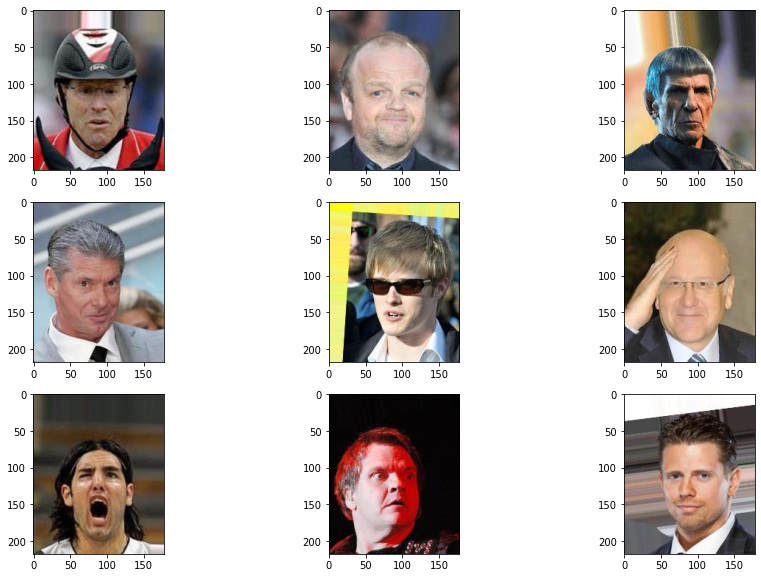

In [5]:
# Showing pictures of man
fig = plt.figure(figsize=(15,10))
for i in range(1,10):
    index = random.randint(0,1000)
    plt.subplot(3,3,i)
    image = plt.imread(man_imgs[index])
    plt.imshow(image)
plt.show()

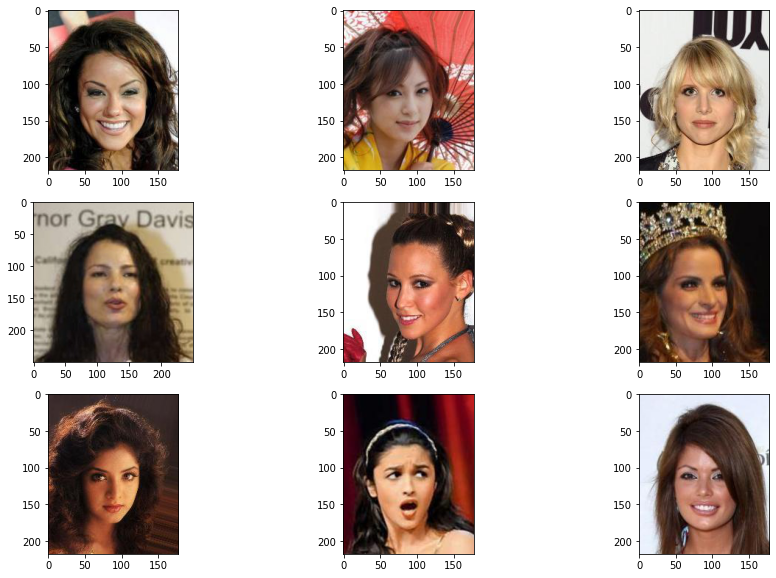

In [6]:
# Showing pictures of woman
fig = plt.figure(figsize=(15,10))
for i in range(1,10):
    index = random.randint(0,1000)
    plt.subplot(3,3,i)
    image = plt.imread(woman_imgs[index])
    plt.imshow(image)
plt.show()

In [8]:
# Resize image to 218x178 and HOG Feature Extraction

def resize_hog(img):
    img = cv2.resize(img, (178,218)) 
    fd, hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    return hog_feature

In [10]:
# Image -> Array
def jpg_image_to_array(image_path):
  with Image.open(image_path) as image:         
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3))                                   
  return im_arr

man_arr = []
woman_arr =[]

for i in man_imgs[:2000]:
    man_arr.append(resize_hog(jpg_image_to_array(i)))
for j in woman_imgs[:2000]:
    woman_arr.append(resize_hog(jpg_image_to_array(j)))
print("Len(man_arr):", len(man_arr))
print("Len(woman_arr):", len(woman_arr))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


Len(man_arr): 2000
Len(woman_arr): 2000


Shpae: (218, 178)


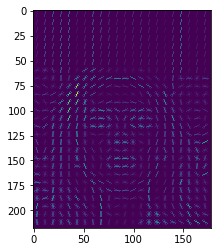

In [11]:
img = woman_arr[10]
plt.imshow(img)
print("Shpae:", img.shape)

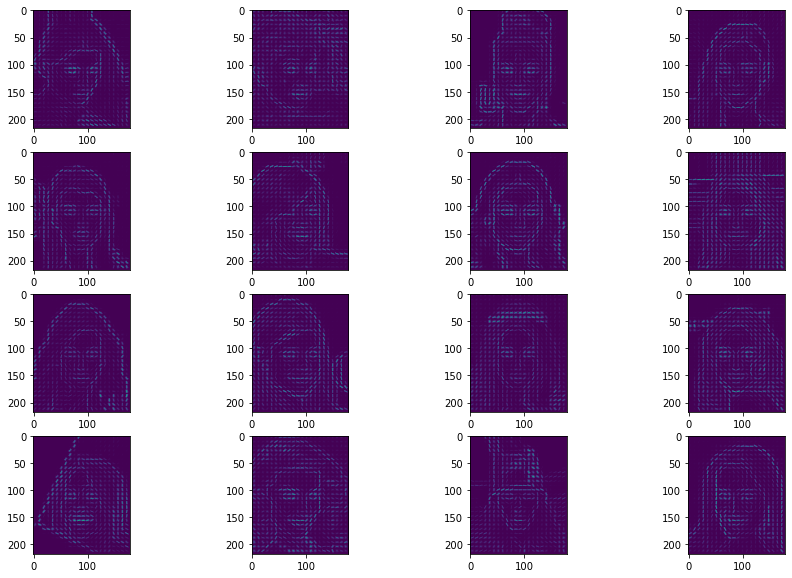

In [235]:
# Showing pictures of woman
fig = plt.figure(figsize=(15,10))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(woman_arr[i])
plt.show()

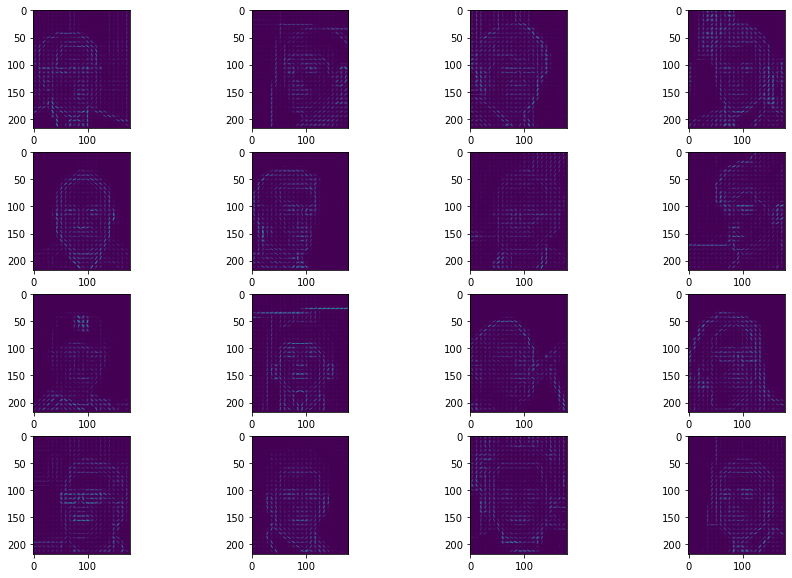

In [236]:
# Showing pictures of man
fig = plt.figure(figsize=(15,10))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(man_arr[i])
plt.show()

In [12]:
# Convert to Pandas
man_df = pd.DataFrame({'picture': man_arr, 'gender': 'man'})
print("Len(man)", len(man_df))
woman_df = pd.DataFrame({'picture': woman_arr, 'gender': 'woman'})
print("Len(woman)", len(woman_df))
df = pd.concat([man_df, woman_df], ignore_index=True)

Len(man) 2000
Len(woman) 2000


In [13]:
# Check shape
counts_shape = dict()
for i in range(len(df["picture"])):
    x = str(df["picture"][i].shape)
    counts_shape[x] = counts_shape.get(x,0) + 1
counts_shape

{'(218, 178)': 4000}

In [14]:
# Trộn data và giữ lại index
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,picture,gender
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",woman
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",man
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",woman
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",man
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",woman


In [15]:
# Encoding colum gender to 0 and 1
# Man:1  |  Woman:0
df = df.sample(frac=1).reset_index(drop=True)
for i in range(int(len(df))):
    if df['gender'][i] == str('man'):
        df['gender'][i] = 1
    else:
        df['gender'][i] = 0
        
print("Unique:", df['gender'].unique)
df.head()

Unique: <bound method Series.unique of 0       1
1       1
2       1
3       1
4       0
       ..
3995    1
3996    0
3997    0
3998    0
3999    1
Name: gender, Length: 4000, dtype: object>


,picture,gender
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [16]:
X = df["picture"]
y = df["gender"].astype('int')

print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)
y[:10]

Shape of x:  (4000,)
Shape of y:  (4000,)


0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: gender, dtype: int64

In [17]:
# Chuyển mảng 2d của ảnh về 1 vector
X_list = list()
for i in range(len(X)):
    nx, ny = X[i].shape
    X_list.append(X[i].reshape((nx*ny)))
    
d2_X = np.array(X_list)
d2_X[1].shape

(38804,)

In [18]:
# Train/Test split 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d2_X, y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)

(2800, 38804)
(1200, 38804)


# Train SVM Model

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [20]:
yhat = clf.predict(X_test)
yhat[0:5]

array([1, 0, 1, 1, 1])

# Evaluation

In [21]:
import pandas as pd
result = pd.DataFrame({'Y_original' : y_test,'Y_predicted' : yhat})
print("Yhat shape:", yhat.shape)
result.head(10)

Yhat shape: (1200,)


,Y_original,Y_predicted
3264,0,1
2559,0,0
15,1,1
1872,1,1
491,1,1
1307,0,0
1055,0,1
328,0,1
1661,0,1
2341,1,1


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       615
           1       0.87      0.92      0.89       585

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200

Confusion matrix, without normalization
[[533  82]
 [ 46 539]]


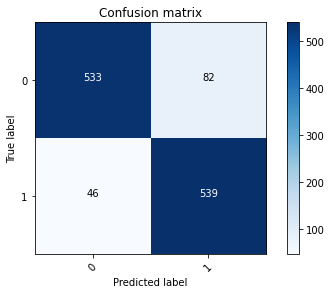

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#-----------------------------------------------------------------------------

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

# Save and Load Weight

In [23]:
# save the model to disk
import joblib
filename = 'gender_classification_hog_svm.sav'
joblib.dump(clf, filename)

['gender_classification_hog_svm.sav']

In [ ]:
# load the model from disk
import joblib
filename = 'gender_classification_hog_svm.sav'
clf = joblib.load(filename)